In [68]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas 
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [70]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [71]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    height = 400,
    width = 600,
    rot = 90)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [72]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)
scaled_data 

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [73]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns = df_market_data.columns)

# Copy the crypto names from the original data
scaled_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index("coin_id")

# Display sample data
scaled_data_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [74]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [75]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1, n_init = 'auto')
    k_model.fit(scaled_data_df)
    inertia.append(k_model.inertia_)


In [76]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

<function matplotlib.pyplot.show(close=None, block=None)>

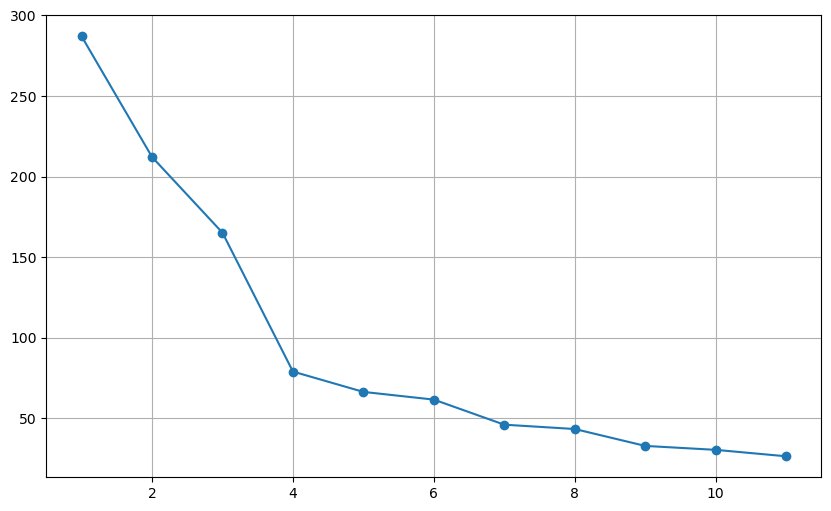

In [77]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.grid(True)
plt.show

In [78]:
elbow_plot = df_elbow.hvplot.line(
    height = 400,
    width = 600,
    rot = 90)
elbow_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [79]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)


In [80]:
# Fit the K-Means model using the scaled data
model.fit(scaled_data_df)

/Users/franciscrawford/opt/anaconda3/envs/ul/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [81]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(scaled_data_df) 

# Print the resulting array of cluster values.
kmeans_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [82]:
# Create a copy of the DataFrame
scaled_data_copy = scaled_data_df.copy()

In [83]:
# Add a new column to the DataFrame with the predicted clusters
scaled_data_copy['clusters'] = kmeans_predictions

# Display sample data
scaled_data_copy

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [84]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
copy_plot = scaled_data_copy.hvplot.scatter(
    x = "price_change_percentage_24h", 
    y = "price_change_percentage_7d", 
    by = "clusters")

---

### Optimize Clusters with Principal Component Analysis.

In [85]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [86]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
fit_pca = pca_model.fit_transform(scaled_data_copy)
# View the first five rows of the DataFrame. 
fit_pca[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [87]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.37269822, 0.32489961, 0.18917649])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** It is about 89% or 89.442783% to be exact.

In [93]:
# Create a new DataFrame with the PCA data.
PCA_Data_df = pd.DataFrame(fit_pca, columns = ["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
PCA_Data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
#PCA_Data_df = df_market_data.set_index("coin_id")

# Display sample data
PCA_Data_df

,PC1,PC2,PC3,coin_id
0,1.194082,-0.902074,-0.585338,bitcoin
1,1.009706,-0.663584,-1.136950,ethereum
2,-0.722536,-0.307632,0.721813,tether
3,-0.748266,-0.332379,0.558479,ripple
4,2.258539,-1.826966,-1.378166,bitcoin-cash
5,1.719188,-0.993613,-0.663561,binancecoin
6,1.396401,-0.721542,-2.731341,chainlink
7,1.359187,-0.651114,-1.482162,cardano
8,0.869062,-0.828724,-0.856779,litecoin
9,-0.763186,-0.619275,0.315895,bitcoin-cash-sv


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_2 = list(range(1,12))
k

In [ ]:
# Create an empty list to store the inertia values
inertia_2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(PCA_Data_df)
    inertia_2.append(k_model.inertia_2_)

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve = {"k_2":k_2, "inertia_2": inertia_2}
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve)
elbow_curve_df

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_curve_df.hvplot.line(
    x = "k_2", 
    y = "inertia_2", 
    xticks=k_2, 
    title = "Optimal value for k")
elbow_plot 

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the previous answer was 3.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
model_2 = KMeans(n_clusters=4, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data
model_2.fit(PCA_Data_df)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmeans_predictions_2 = model_2.predict(PCA_Data_df)
# Print the resulting array of cluster values.
kmeans_predictions_2

In [ ]:
# Create a copy of the DataFrame with the PCA data
PCA_data_copy = PCA_Data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
PCA_data_copy['cluster2'] = kmeans_predictions_2

# Display sample data
PCA_data_copy[:5]

In [95]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot_2 = PCA_Data_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    hover_cols = "coin_id",
    title = "Cluster Cryptocurrencies "
    
)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
elbow_plot + elbow_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [96]:
# Composite plot to contrast the clusters
plot_2 + copy_plot

:Layout
   .Scatter.I   :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.I :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 